Tapia Ramirez Jair - 9CV11
Transformacion entre modelos de color

CMY

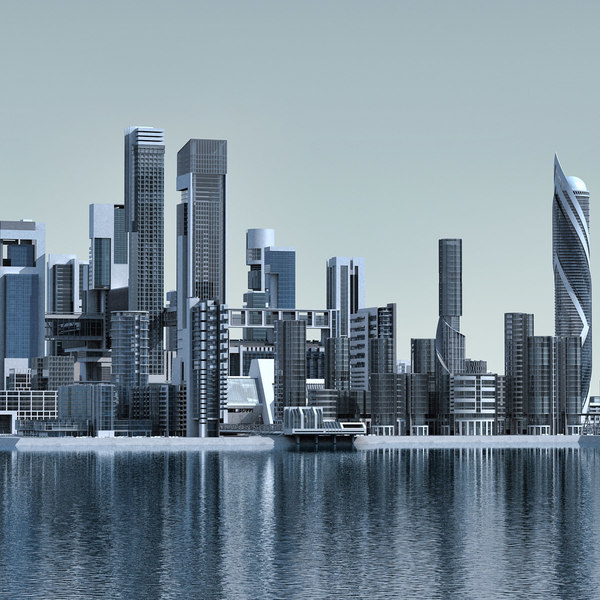

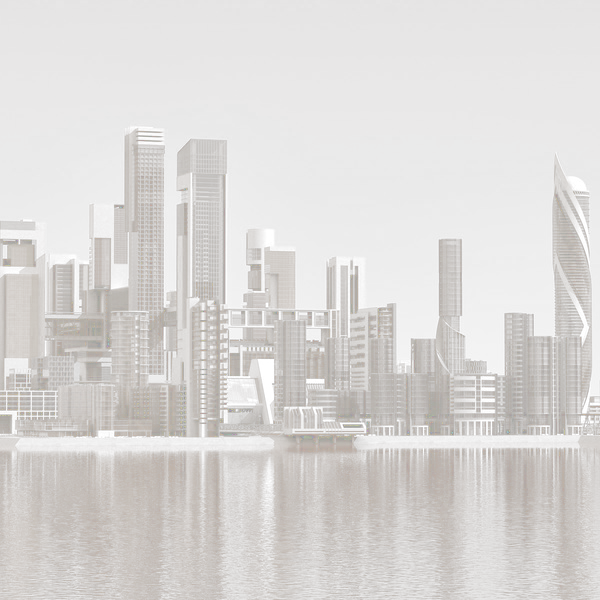

In [ ]:
import cv2
import math
import numpy as np
from google.colab.patches import cv2_imshow

def is_input_invalid(value: int) -> bool:
    return not(type(value) is int) or not(value <= 255)
    
class CMYK:
    def __init__(self, c, m, y, k) -> None:
        self.c = c
        self.m = m
        self.y = y
        self.k = k
    def print(self):
        print('({c}, {m}, {y}, {k})'.format(c = math.trunc(self.c), m = math.trunc(self.m), y = math.trunc(self.y), k = math.trunc(self.k)))
    def return_array(self):
        return [math.trunc(self.c), math.trunc(self.m), math.trunc(self.y), math.trunc(self.k)]

class RGB:
    def __init__(self, red, green, blue) -> None:
        self.red = red
        self.green = green
        self.blue = blue
    def print(self):
        print('({r}, {g}, {b})'.format(r = self.red, g = self.green, b = self.blue))
    def convert_to_CMYK(self) -> CMYK:
        if(self.red, self.green, self.blue) == (0, 0, 0):
            return 0, 0, 0, 100
        
        c = 1 - self.red / 255
        m = 1 - self.green / 255
        y = 1 - self.blue / 255

        minimal_cmy = min(c, m, y)
        c = (c - minimal_cmy) / (1 - minimal_cmy)
        m = (m - minimal_cmy) / (1 - minimal_cmy)
        y = (y - minimal_cmy) / (1 - minimal_cmy)
        k = minimal_cmy

        return c * 100, m * 100, y * 100, k * 100


image = cv2.imread('/content/img1.jpg')

newImage = []
for column in image:
    convertedColumnPixels = []
    for pixel in column:
        rgb = RGB(*pixel)
        convertedPixel = CMYK(*rgb.convert_to_CMYK()).return_array()
        convertedColumnPixels.append(convertedPixel)
    newImage.append(convertedColumnPixels)

npNewImage = np.array(newImage)

cv2_imshow(image)
print('\t')
cv2_imshow(npNewImage)

CMYK

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


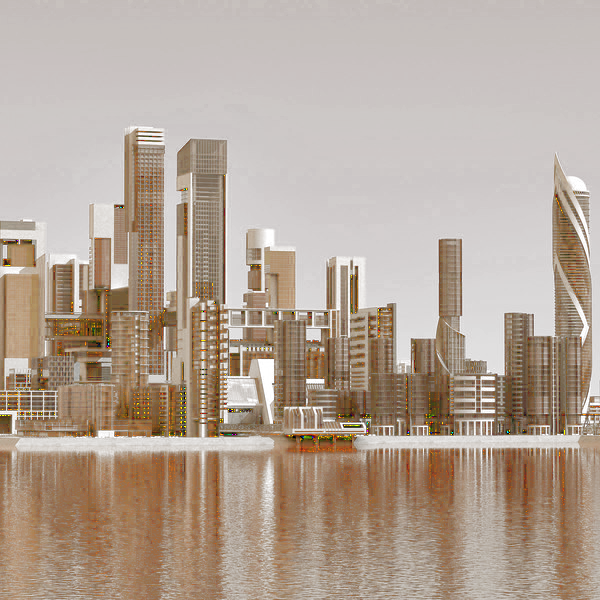

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
imagen= cv2.imread('img1.jpg')
img=np.copy(imagen) # creo una copia de la imagen para preservar la original
bgr = img.astype(float)/255.
K = 1 - np.max(bgr, axis=2)
C = (1-bgr[...,2] - K)/(1-K)
M = (1-bgr[...,1] - K)/(1-K)
Y = (1-bgr[...,0] - K)/(1-K)
CMYK = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)
Y, M, C, K = cv2.split(CMYK)
cmyk=cv2.merge([C,M,Y,K])
cv2_imshow(cmyk)

Escala de Grises

	
Escala de Grises


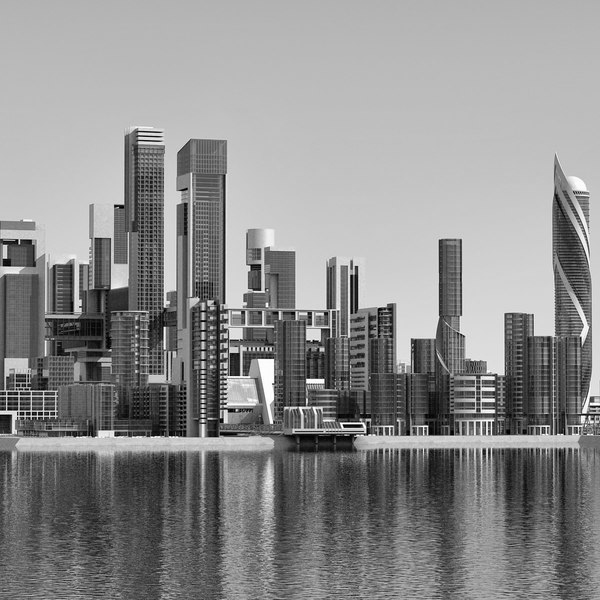

In [ ]:
img = cv2.imread('/content/img1.jpg')
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
grises = 0.2989 * R + 0.5870 * G + 0.1140 * B
#print('Imagen real')
#cv2_imshow(img)
print('\t')
print('Escala de Grises')
cv2_imshow(grises)

HSI

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


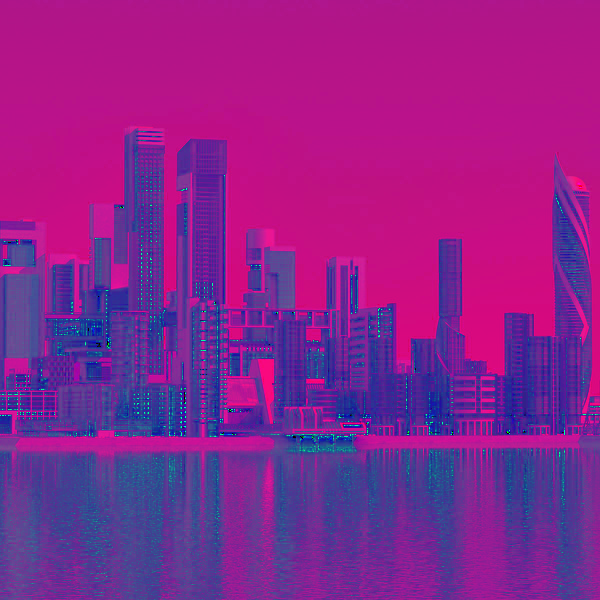

In [ ]:
import cv2
import numpy as np

def RGB2HSI(rgb_img):

    #Save the number of rows and columns of the original image
    row = np.shape(rgb_img)[0]
    col = np.shape(rgb_img)[1]
    #Copy the original image
    hsi_img = rgb_img.copy()
    #Channel splitting the image
    B,G,R = cv2.split(rgb_img)
    # Normalize the channel to [0,1]
    [B,G,R] = [ i/ 255.0 for i in ([B,G,R])]
    H = np.zeros((row, col))    #Define H channel
    I = (R + G + B) / 3.0       #Calculate I channel
    S = np.zeros((row,col))      #Define S channel
    for i in range(row):
        den = np.sqrt((R[i]-G[i])**2+(R[i]-B[i])*(G[i]-B[i]))
        thetha = np.arccos(0.5*(R[i]-B[i]+R[i]-G[i])/den)   #Calculate the included angle
        h = np.zeros(col)               #Define temporary array
        #den>0 and G>=B element h is assigned to thetha
        h[B[i]<=G[i]] = thetha[B[i]<=G[i]]
        #den>0 and G<=B element h is assigned to thetha
        h[G[i]<B[i]] = 2*np.pi-thetha[G[i]<B[i]]
        #den<0 element h is assigned a value of 0
        h[den == 0] = 0
        H[i] = h/(2*np.pi)      #Assign to the H channel after radiating
    #Calculate S channel
    for i in range(row):
        min = []
        #Find the minimum value of each group of RGB values
        for j in range(col):
            arr = [B[i][j],G[i][j],R[i][j]]
            min.append(np.min(arr))
        min = np.array(min)
        #Calculate S channel
        S[i] = 1 - min*3/(R[i]+B[i]+G[i])
        #I is 0 directly assigned to 0
        S[i][R[i]+B[i]+G[i] == 0] = 0
    #Extend to 255 for easy display, generally H component is between [0,2pi], S and I are between [0,1]
    hsi_img[:,:,0] = H*255
    hsi_img[:,:,1] = S*255
    hsi_img[:,:,2] = I*255
    return hsi_img

def HSI2RGB(hsi_img):
    
    # Save the number of rows and columns of the original image
    row = np.shape(hsi_img)[0]
    col = np.shape(hsi_img)[1]
    #Copy the original image
    rgb_img = hsi_img.copy()
    #Channel splitting the image
    H,S,I = cv2.split(hsi_img)
    # Normalize the channel to [0,1]
    [H,S,I] = [ i/ 255.0 for i in ([H,S,I])]
    R,G,B = H,S,I
    for i in range(row):
        h = H[i]*2*np.pi
        #H is greater than or equal to 0 and less than 120 degrees
        a1 = h >=0
        a2 = h < 2*np.pi/3
        a = a1 & a2         #Fancy index of the first case
        tmp = np.cos(np.pi / 3 - h)
        b = I[i] * (1 - S[i])
        r = I[i]*(1+S[i]*np.cos(h)/tmp)
        g = 3*I[i]-r-b
        B[i][a] = b[a]
        R[i][a] = r[a]
        G[i][a] = g[a]
        #H is greater than or equal to 120 degrees and less than 240 degrees
        a1 = h >= 2*np.pi/3
        a2 = h < 4*np.pi/3
        a = a1 & a2         #Fancy index of the second case
        tmp = np.cos(np.pi - h)
        r = I[i] * (1 - S[i])
        g = I[i]*(1+S[i]*np.cos(h-2*np.pi/3)/tmp)
        b = 3 * I[i] - r - g
        R[i][a] = r[a]
        G[i][a] = g[a]
        B[i][a] = b[a]
        #H is greater than or equal to 240 degrees and less than 360 degrees
        a1 = h >= 4 * np.pi / 3
        a2 = h < 2 * np.pi
        a = a1 & a2             #Fancy index of the third case
        tmp = np.cos(5 * np.pi / 3 - h)
        g = I[i] * (1-S[i])
        b = I[i]*(1+S[i]*np.cos(h-4*np.pi/3)/tmp)
        r = 3 * I[i] - g - b
        B[i][a] = b[a]
        G[i][a] = g[a]
        R[i][a] = r[a]
    rgb_img[:,:,0] = B*255
    rgb_img[:,:,1] = G*255
    rgb_img[:,:,2] = R*255
    return rgb_img

def run_main():
  
    #Use opencv to read pictures
    rgb_img = cv2.imread('img1.jpg')
    #Conduct color space conversion
    hsi_img = RGB2HSI(rgb_img)
    rgb_img2 = HSI2RGB(hsi_img)
    #opencvThe color space conversion result of the library
    hsi_img2 = cv2.cvtColor(rgb_img,cv2.COLOR_BGR2HSV)
    rgb_img3 = cv2.cvtColor(hsi_img2,cv2.COLOR_HSV2BGR)
    cv2_imshow(hsi_img)
    #cv2_imshow(hsi_img2)

    cv2.waitKey()
    cv2.destroyAllWindows()

if __name__ == '__main__':
    run_main()

HSV

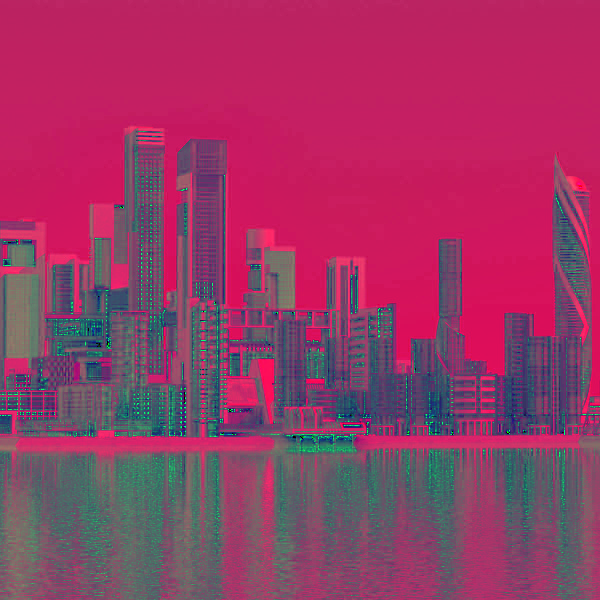

In [ ]:
imagen= cv2.imread('img1.jpg')
img=np.copy(imagen) # creo una copia de la imagen para preservar la original
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

YCBCR

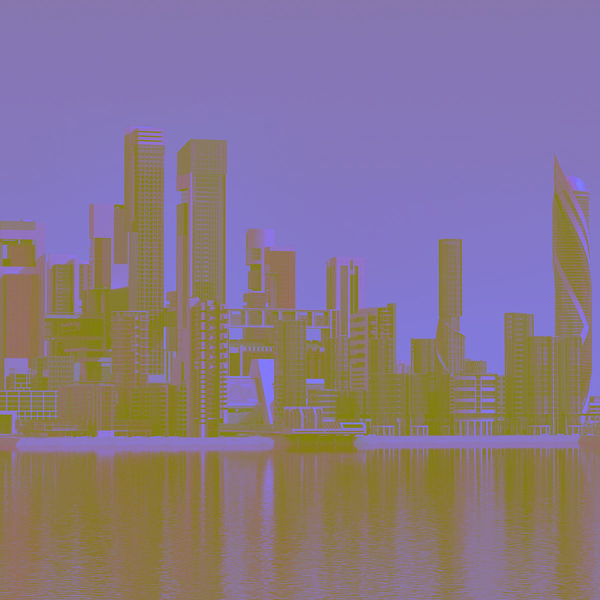

In [ ]:
imagen= cv2.imread('img1.jpg')
img=np.copy(imagen) # creo una copia de la imagen para preservar la original
YCRCB = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
cv2_imshow(YCRCB)
cv2.waitKey(0)
cv2.destroyAllWindows()